In [2]:
import pde
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy
import torch
import h5py
import xarray as xr
import multiprocessing as mp
from ks import get_sim
import os
import multiprocessing as mp
print(mp.cpu_count())

14


# Visualize and aggregate

In [14]:
temporal_downscaling = 1
data = xr.open_dataset('../data/KS/processed/ks_train.nc').u[:,::temporal_downscaling,:]
data

<xarray.DataArray 'u' (samples: 9000, t: 300, x: 256)>
[691200000 values with dtype=float64]
Coordinates:
  * t        (t) int32 0 1 2 3 4 5 6 7 8 ... 291 292 293 294 295 296 297 298 299
  * x        (x) float64 0.0 0.3922 0.7843 1.176 ... 98.82 99.22 99.61 100.0
Dimensions without coordinates: samples

Text(0, 0.5, 't')

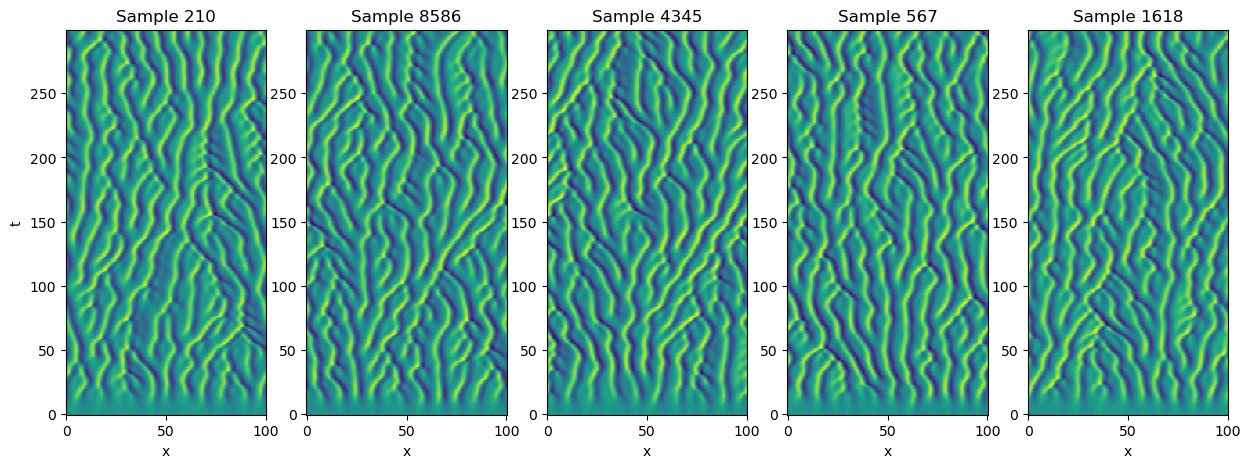

In [15]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
samples = np.random.randint(0, data.shape[0], 5)
t = data.coords["t"].data
x = data.coords["x"].data
for i,s in enumerate(samples):
    axs[i].pcolormesh(x, t, data[s])
    axs[i].set_title(f"Sample {s}")
    axs[i].set_xlabel("x")
axs[0].set_ylabel("t")